<a href="https://colab.research.google.com/github/KhuzaimaHassan/Data-Mining/blob/main/DM_lab_7%268.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [ ]:
data=pd.read_csv("/content/Marital Status.csv")
data.head()

,Refund,Marital Status,Taxable Incocme,Cheat
0,Yes,Single,125K,No
1,No,Married,100K,No
2,No,Single,70K,No
3,Yes,Married,120K,No
4,No,Divorced,95K,Yes


In [ ]:
print(data.isnull().sum())


Refund             0
Marital Status     0
Taxable Incocme    0
Cheat              0
dtype: int64


<Axes: xlabel='Cheat', ylabel='count'>

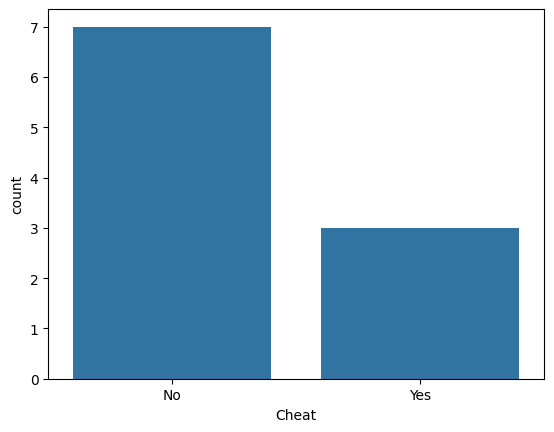

In [ ]:
sns.countplot(x=data['Cheat'])

In [ ]:
data.shape

(10, 4)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [ ]:
for i in range (len(data.columns[:-1])):
  data[data.columns[i]]=le.fit_transform(data[data.columns[i]])
data.head()

,Refund,Marital Status,Taxable Incocme,Cheat
0,1,2,2,No
1,0,1,0,No
2,0,2,5,No
3,1,1,1,No
4,0,0,9,Yes


In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop('Cheat',axis=1)
y=data['Cheat']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
pred=dt.predict(X_test)
print(pred)

['No' 'No']


In [ ]:
y_test

,Cheat
8,No
1,No


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

1.0
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
features=list(x.columns)
print(features)

['Refund', 'Marital Status', 'Taxable Incocme']


[Text(0.5, 0.75, 'Taxable Incocme <= 6.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.625, 0.5, '  False')]

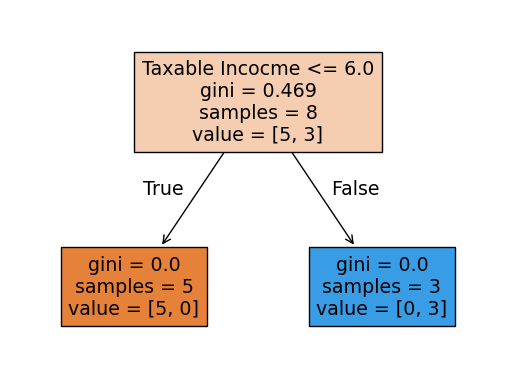

In [ ]:
plot_tree(dt,feature_names=features,filled=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, criterion='gini',random_state=42)
rf.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [ ]:
pred=rf.predict(X_test)
print(pred)

['No' 'No']


In [ ]:
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

1.0
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



[Text(0.6, 0.8333333333333334, 'Refund <= 0.5\ngini = 0.5\nsamples = 5\nvalue = [4, 4]'),
 Text(0.4, 0.5, 'Taxable Incocme <= 6.0\ngini = 0.32\nsamples = 3\nvalue = [1, 4]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 4]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

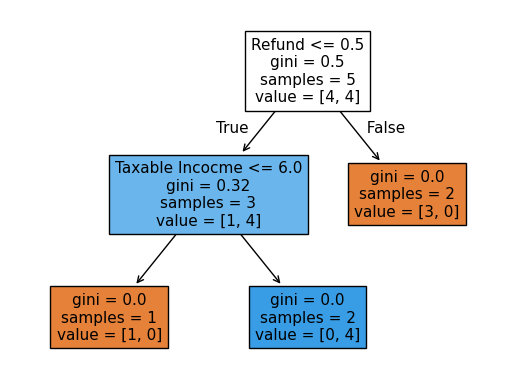

In [ ]:
tree_to_plot = rf.estimators_[0]

plot_tree(tree_to_plot, feature_names=features, filled=True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay


df=pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
print(df.isnull().sum())
df['species'].value_counts()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


In [ ]:

df = df.dropna(subset=['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm','body_mass_g','sex'])

In [ ]:
print(df.isnull().sum())
df['species'].value_counts()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


,count
species,
Adelie,146
Gentoo,120
Chinstrap,68


In [ ]:

from sklearn.preprocessing import StandardScaler, LabelEncoder

df['island'] = LabelEncoder().fit_transform(df['island'])
df['sex'] = LabelEncoder().fit_transform(df['sex'].astype(str))



In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,2


In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [ ]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
DT = DecisionTreeClassifier(criterion='gini',random_state=42)
DT.fit(X_train, y_train)

pred = DT.predict(X_test)
print(pred)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))


['Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Chinstrap' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Chinstrap' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Adelie' 'Chinstrap' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Adelie']
1.0
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg     

In [ ]:
DT1 = DecisionTreeClassifier(criterion='entropy',random_state=42)
DT1.fit(X_train, y_train)

pred = DT1.predict(X_test)
print(pred)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))


['Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Chinstrap' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Chinstrap' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Adelie' 'Chinstrap' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Adelie']
1.0
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg     

In [ ]:
feature_importances = DT.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


             Feature  Importance
3  flipper_length_mm    0.529646
1   culmen_length_mm    0.349063
0             island    0.097160
2    culmen_depth_mm    0.018279
4        body_mass_g    0.005851
5                sex    0.000000


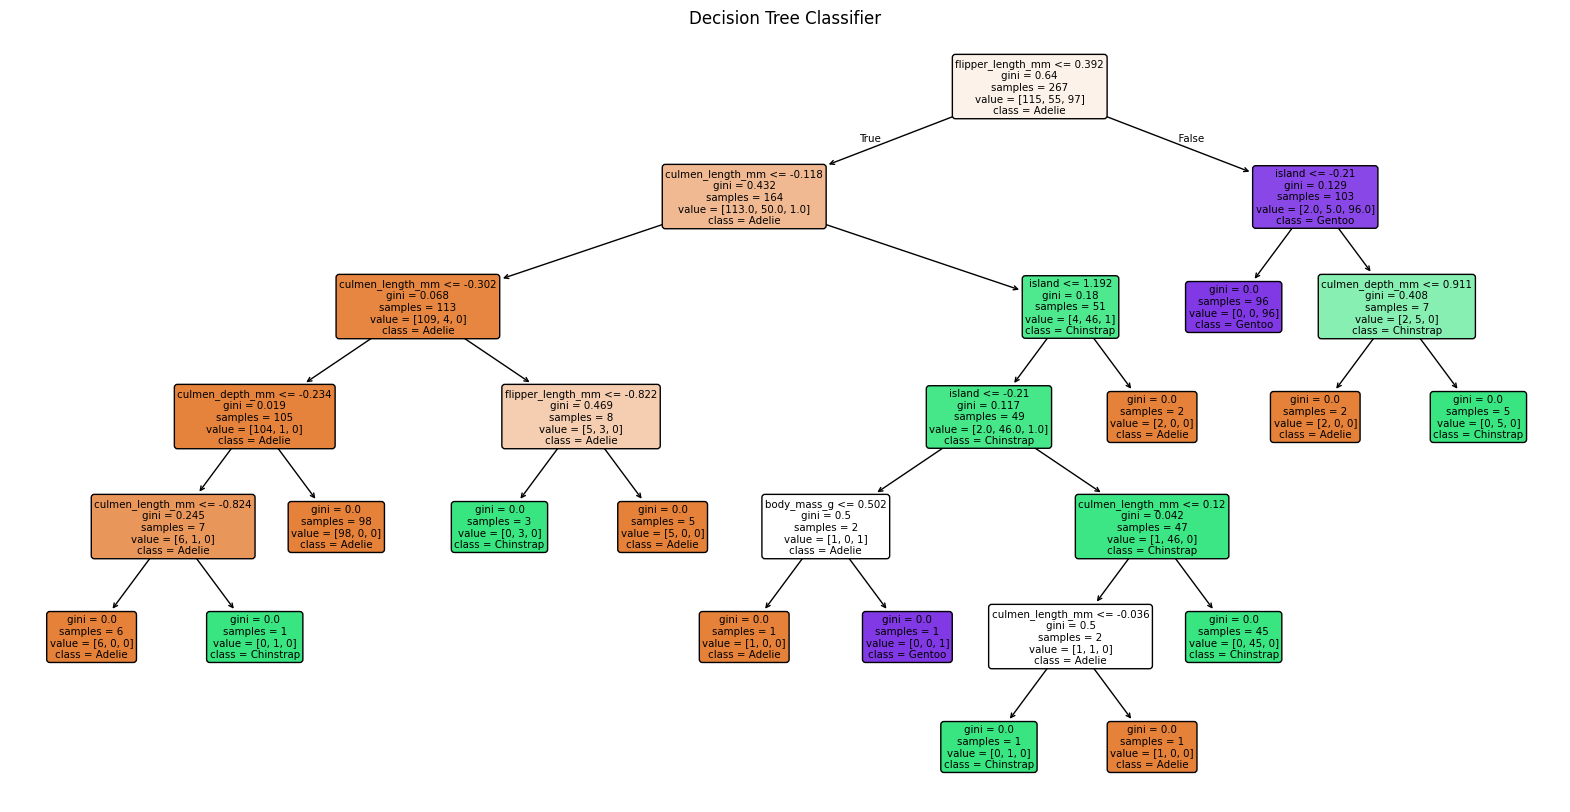

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(DT, feature_names=X.columns, class_names=DT.classes_, filled=True, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()

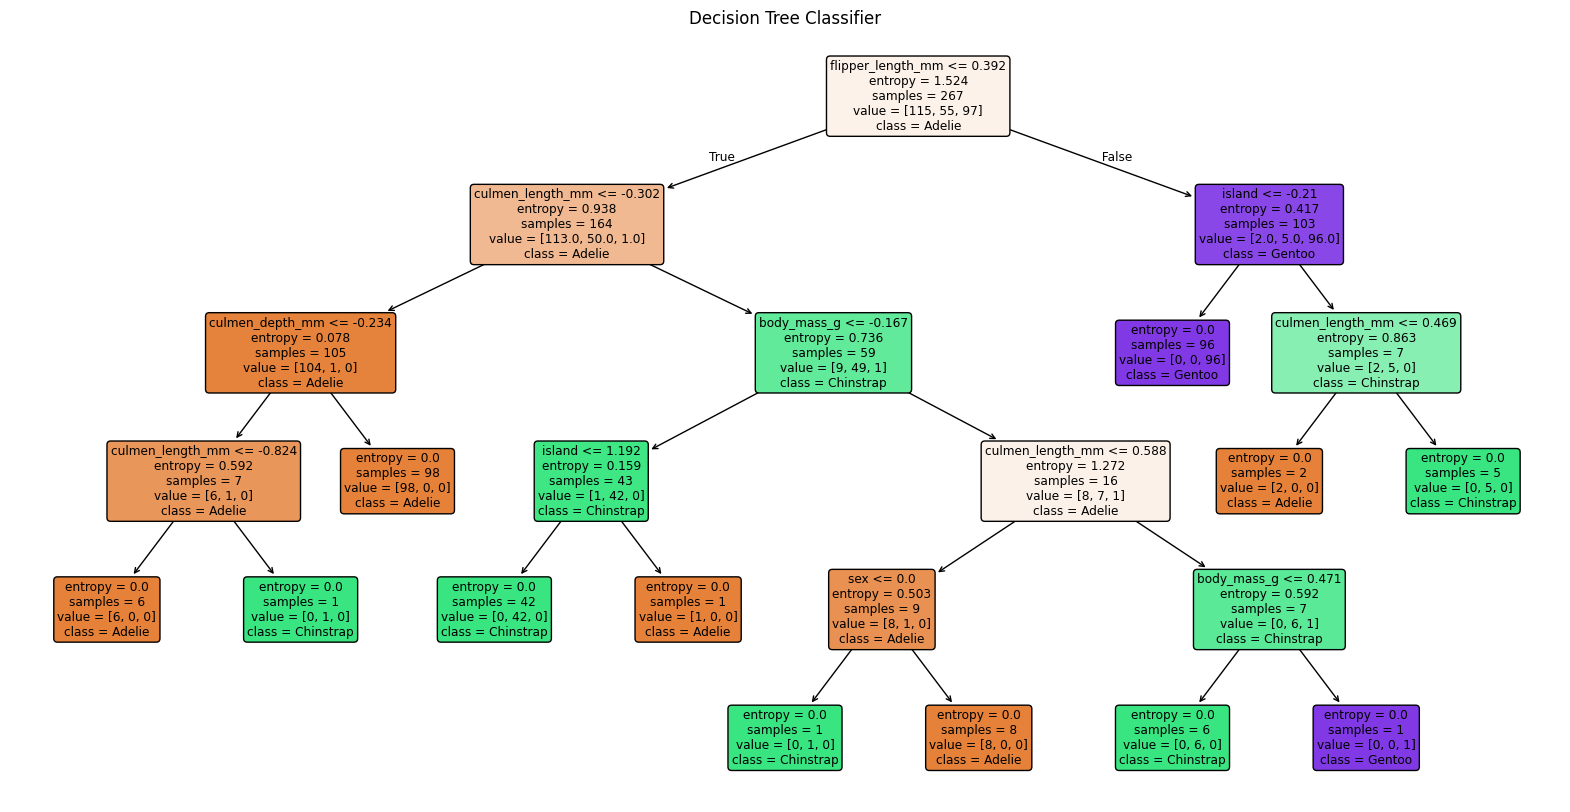

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(DT1, feature_names=X.columns, class_names=DT1.classes_, filled=True, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()

In [ ]:
features1=list(X.columns)
print(features1)

['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


[Text(0.6578947368421053, 0.9285714285714286, 'flipper_length_mm <= 0.392\ngini = 0.64\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.47368421052631576, 0.7857142857142857, 'culmen_length_mm <= -0.118\ngini = 0.432\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.5657894736842105, 0.8571428571428572, 'True  '),
 Text(0.2631578947368421, 0.6428571428571429, 'culmen_length_mm <= -0.302\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.15789473684210525, 0.5, 'culmen_depth_mm <= -0.234\ngini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.10526315789473684, 0.35714285714285715, 'culmen_length_mm <= -0.824\ngini = 0.245\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.05263157894736842, 0.21428571428571427, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.15789473684210525, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.21052631578947367, 0.35714285714285715, 'gini = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.3684210526315789, 0.5

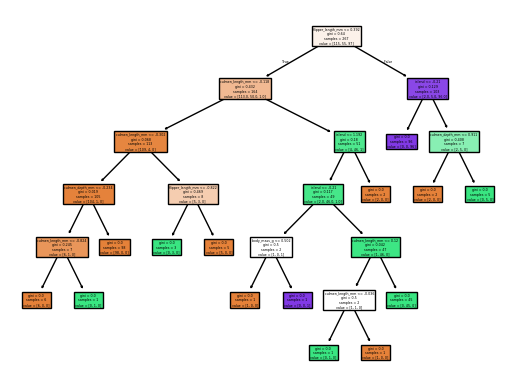

In [ ]:
plot_tree(DT,feature_names=features1,filled=True)

In [ ]:
RF = RandomForestClassifier(n_estimators=100,random_state=42)
RF.fit(X_train, y_train)

pred = RF.predict(X_test)
print(pred)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

['Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Chinstrap' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Chinstrap' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Adelie' 'Chinstrap' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Adelie']
1.0
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg     

[Text(0.5166666666666667, 0.95, 'flipper_length_mm <= 0.356\ngini = 0.634\nsamples = 168\nvalue = [124, 56, 87]'),
 Text(0.38333333333333336, 0.85, 'island <= -0.21\ngini = 0.424\nsamples = 107\nvalue = [123, 54, 0]'),
 Text(0.45000000000000007, 0.8999999999999999, 'True  '),
 Text(0.31666666666666665, 0.75, 'gini = 0.0\nsamples = 27\nvalue = [49, 0, 0]'),
 Text(0.45, 0.75, 'island <= 1.192\ngini = 0.488\nsamples = 80\nvalue = [74, 54, 0]'),
 Text(0.38333333333333336, 0.65, 'culmen_depth_mm <= 0.758\ngini = 0.494\nsamples = 62\nvalue = [43, 54, 0]'),
 Text(0.2, 0.55, 'culmen_length_mm <= -0.375\ngini = 0.496\nsamples = 41\nvalue = [37, 31, 0]'),
 Text(0.13333333333333333, 0.45, 'culmen_length_mm <= -0.577\ngini = 0.097\nsamples = 23\nvalue = [37, 2, 0]'),
 Text(0.06666666666666667, 0.35, 'gini = 0.0\nsamples = 19\nvalue = [34, 0, 0]'),
 Text(0.2, 0.35, 'body_mass_g <= -0.82\ngini = 0.48\nsamples = 4\nvalue = [3, 2, 0]'),
 Text(0.13333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue 

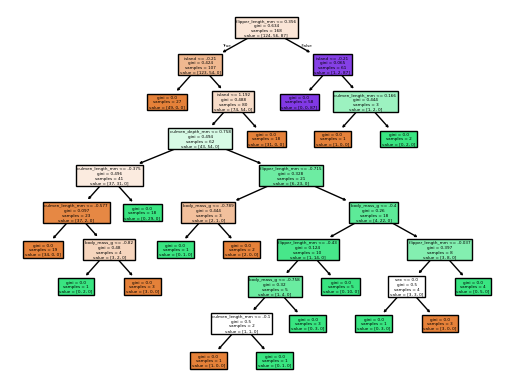

In [ ]:
tree_to_plot1 = RF.estimators_[0]

plot_tree(tree_to_plot1, feature_names=features1, filled=True)

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('penguins_size.csv')

# Drop missing values
df = df.dropna(subset=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','sex'])

# Encode categorical features
df['island'] = LabelEncoder().fit_transform(df['island'])
df['sex'] = LabelEncoder().fit_transform(df['sex'].astype(str))

# Scale numerical features
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Prepare feature matrix and target vector
X = df.drop('species', axis=1)
y = df['species']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Random Forest with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
# Best model and evaluation
best_rf = grid_search.best_estimator_
pred = best_rf.predict(X_test)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 1.0
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [ ]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Highest to Lowest):")
print(importance_df)


Feature Importances (Highest to Lowest):
             Feature  Importance
1   culmen_length_mm    0.355528
3  flipper_length_mm    0.250079
2    culmen_depth_mm    0.186337
0             island    0.110571
4        body_mass_g    0.087713
5                sex    0.009772


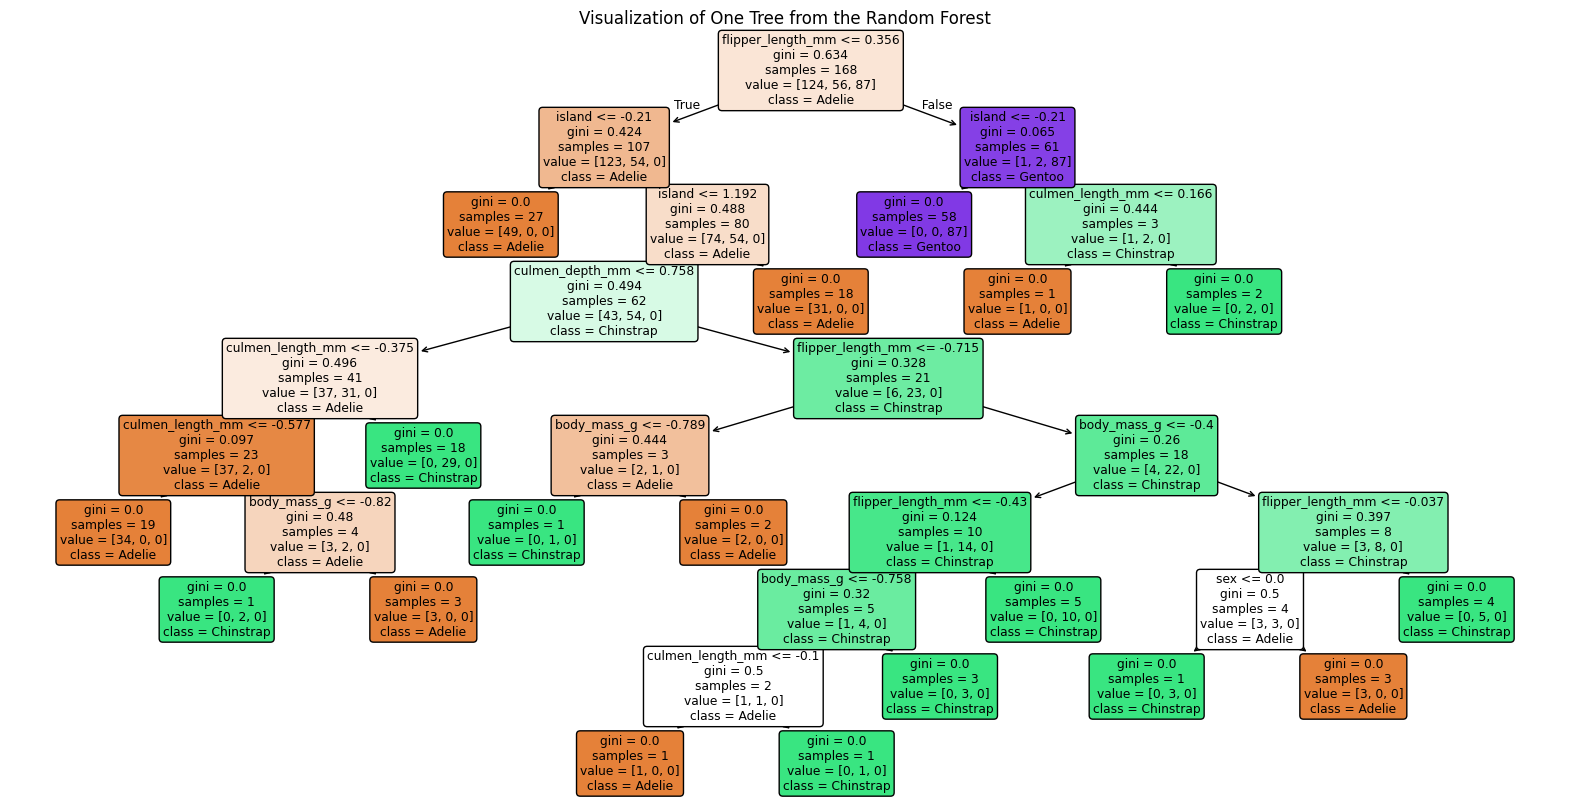

In [ ]:
# Visualize one of the trees in the forest
plt.figure(figsize=(20, 10))
plot_tree(best_rf.estimators_[0], feature_names=X.columns, class_names=best_rf.classes_, filled=True, rounded=True)
plt.title("Visualization of One Tree from the Random Forest")
plt.show()